<a href="https://colab.research.google.com/github/Deepthi-01997264/cs480student/blob/main/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

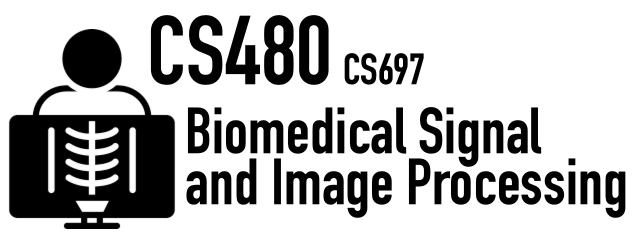
# Assignment 1


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset
import pandas as pd
import numpy as np
import scipy

In [ ]:
from scipy.misc import electrocardiogram
ecg = electrocardiogram()

In [ ]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [ ]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

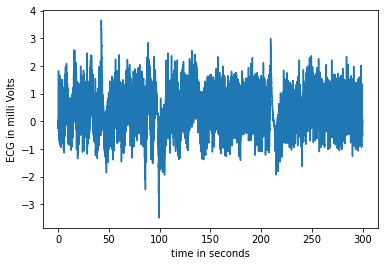

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time_data = np.arange(ecg.size) / SAMPLING_RATE

plt.plot(time_data, ecg)
plt.xlabel("time in seconds")
plt.ylabel("ECG in milli Volts")
 
# display
plt.show()

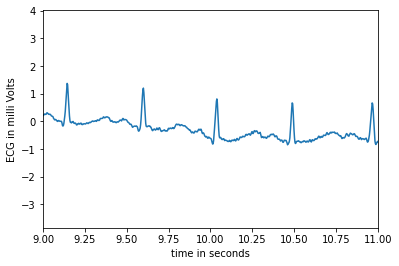

In [ ]:
plt.plot(time_data, ecg)
plt.xlabel("time in seconds")
plt.ylabel("ECG in milli Volts")
plt.xlim(9, 11)
# plt.ylim(-1, 1.5)
# display
plt.show()

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


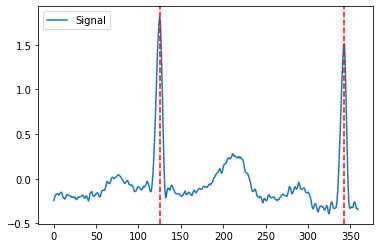

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

(2300.0, 3200.0)

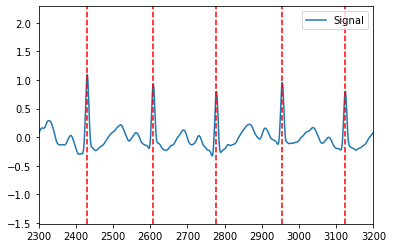

In [ ]:
signals, info = nk.ecg_process(ecg, sampling_rate=SAMPLING_RATE)

rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

plot = nk.events_plot(rpeaks, cleaned_ecg)
plt.xlim(2300, 3200)

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

Heart Rate = 300/5 = 60

Yes, patient hav regular heart rate.


**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [ ]:
_, waves_peak = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")

(2300.0, 3200.0)

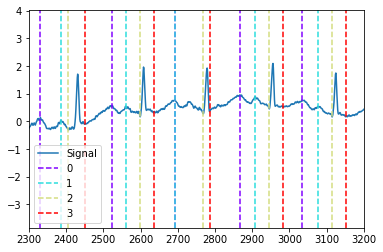

In [ ]:
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg)

plt.xlim(2300, 3200)

In [ ]:
# TODO Does the detection work well?

Yes, it improve the result somewhat!

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
def signal_filter(
    signal,
    sampling_rate=SAMPLING_RATE,
    lowcut=None,
    highcut=None,
    method="butterworth",
    order=2,
    window_size="default",
    powerline=50,
):
    signal = nk.signal_simulate(duration=10, frequency=0.5) # Low freq
    signal += nk.signal_simulate(duration=10, frequency=5) # High freq
    
    fig1 = pd.DataFrame({"Raw": signal,
                          "Butter_2": nk.signal_filter(signal, highcut=3, method='butterworth', order=2),
                          "Butter_2_BA": nk.signal_filter(signal, highcut=3, method='butterworth_ba', order=2),
                          "Butter_5": nk.signal_filter(signal, highcut=3, method='butterworth', order=5),
                          "Butter_5_BA": nk.signal_filter(signal, highcut=3, method='butterworth_ba', order=5),
                          "Bessel_2": nk.signal_filter(signal, highcut=3, method='bessel', order=2),
                          "Bessel_5": nk.signal_filter(signal, highcut=3, method='bessel', order=5),
                          "FIR": nk.signal_filter(signal, highcut=3, method='fir')}).plot(subplots=True)
    
    fig2 = pd.DataFrame({"Raw": signal,
                          "Butter_2": nk.signal_filter(signal, lowcut=2, method='butterworth', order=2),
                          "Butter_2_ba": nk.signal_filter(signal, lowcut=2, method='butterworth_ba', order=2),
                          "Butter_5": nk.signal_filter(signal, lowcut=2, method='butterworth', order=5),
                          "Butter_5_BA": nk.signal_filter(signal, lowcut=2, method='butterworth_ba', order=5),
                          "Bessel_2": nk.signal_filter(signal, lowcut=2, method='bessel', order=2),
                          "Bessel_5": nk.signal_filter(signal, lowcut=2, method='bessel', order=5),
                          "FIR": nk.signal_filter(signal, lowcut=2, method='fir')}).plot(subplots=True)
    
    original = nk.rsp_simulate(duration=30, method="breathmetrics", noise=0)
    signal = nk.signal_distort(original, noise_frequency=[0.1, 2, 10, 100], noise_amplitude=1, powerline_amplitude=1)
    
    fig3 = pd.DataFrame({"Raw": signal,
                          "Butter_2": nk.signal_filter(signal, lowcut=10/60, highcut=30/60,
                                                       method='butterworth', order=2),
                          "Butter_2_BA": nk.signal_filter(signal, lowcut=10/60, highcut=30/60,
                                                          method='butterworth_ba', order=2),
                          "Butter_5": nk.signal_filter(signal, lowcut=10/60, highcut=30/60,
                                                       method='butterworth', order=5),
                          "Butter_5_BA": nk.signal_filter(signal, lowcut=10/60, highcut=30/60,
                                                          method='butterworth_ba', order=5),
                          "Bessel_2": nk.signal_filter(signal, lowcut=10/60, highcut=30/60,
                                                       method='bessel', order=2),
                          "Bessel_5": nk.signal_filter(signal, lowcut=10/60, highcut=30/60,
                                                       method='bessel', order=5),
                          "FIR": nk.signal_filter(signal, lowcut=10/60, highcut=30/60,
                                                  method='fir'),
                          "Savgol": nk.signal_filter(signal, method='savgol')}).plot(subplots=True)
    
    method = method.lower()


    if method in ["sg", "savgol", "savitzky-golay"]:
        filtered = _signal_filter_savgol(signal, sampling_rate, order, window_size=window_size)
    elif method in ["powerline"]:
            filtered = _signal_filter_powerline(signal, sampling_rate, powerline)
    else:

        # Sanity checks
        if lowcut is None and highcut is None:
            raise ValueError(
                "NeuroKit error: signal_filter(): you need to specify a 'lowcut' or a 'highcut'."
            )

        if method in ["butter", "butterworth"]:
            filtered = _signal_filter_butterworth(signal, sampling_rate, lowcut, highcut, order)
        elif method in ["butter_ba", "butterworth_ba"]:
            filtered = _signal_filter_butterworth_ba(signal, sampling_rate, lowcut, highcut, order)
        elif method in ["bessel"]:
            filtered = _signal_filter_bessel(signal, sampling_rate, lowcut, highcut, order)
        elif method in ["fir"]:
            filtered = _signal_filter_fir(signal, sampling_rate, lowcut, highcut, window_size=window_size)
        else:
            raise ValueError(
                "NeuroKit error: signal_filter(): 'method' should be",
                " one of 'butterworth', 'butterworth_ba', 'bessel',",
                " 'savgol' or 'fir'."
            )
    return filtered

def _signal_filter_savgol(signal, sampling_rate=1000, order=2, window_size="default"):
    """Filter a signal using the Savitzky-Golay method.

    Default window size is chosen based on `Sadeghi, M., & Behnia, F. (2018). Optimum window length of
    Savitzky-Golay filters with arbitrary order. arXiv preprint arXiv:1808.10489.
    <https://arxiv.org/ftp/arxiv/papers/1808/1808.10489.pdf>`_.

    """
    window_size = _signal_filter_windowsize(window_size=window_size, sampling_rate=sampling_rate)
    if window_size % 2 == 0:
        window_size += 1  # Make sure it's odd

    filtered = scipy.signal.savgol_filter(signal, window_length=int(window_size), polyorder=order)
    return filtered

def _signal_filter_fir(signal, sampling_rate=1000, lowcut=None, highcut=None, window_size="default"):
    """Filter a signal using a FIR filter."""
    try:
        import mne
    except ImportError:
        raise ImportError(
            "NeuroKit error: signal_filter(): the 'mne' module is required for this method to run. ",
            "Please install it first (`pip install mne`).",
        )

    if isinstance(window_size, str):
        window_size = "auto"

    filtered = mne.filter.filter_data(
        signal,
        sfreq=sampling_rate,
        l_freq=lowcut,
        h_freq=highcut,
        method="fir",
        fir_window="hamming",
        filter_length=window_size,
        l_trans_bandwidth="auto",
        h_trans_bandwidth="auto",
        phase="zero-double",
        fir_design="firwin",
        pad="reflect_limited",
        verbose=False,
    )
    return filtered


def _signal_filter_butterworth(signal, sampling_rate=1000, lowcut=None, highcut=None, order=5):
    """Filter a signal using IIR Butterworth SOS method."""
    freqs, filter_type = _signal_filter_sanitize(lowcut=lowcut, highcut=highcut, sampling_rate=sampling_rate)

    sos = scipy.signal.butter(order, freqs, btype=filter_type, output="sos", fs=sampling_rate)
    filtered = scipy.signal.sosfiltfilt(sos, signal)
    return filtered


def _signal_filter_butterworth_ba(signal, sampling_rate=1000, lowcut=None, highcut=None, order=5):
    """Filter a signal using IIR Butterworth B/A method."""
    # Get coefficients
    freqs, filter_type = _signal_filter_sanitize(lowcut=lowcut, highcut=highcut, sampling_rate=sampling_rate)

    b, a = scipy.signal.butter(order, freqs, btype=filter_type, output="ba", fs=sampling_rate)
    try:
        filtered = scipy.signal.filtfilt(b, a, signal, method="gust")
    except ValueError:
        filtered = scipy.signal.filtfilt(b, a, signal, method="pad")

    return filtered


def _signal_filter_bessel(signal, sampling_rate=1000, lowcut=None, highcut=None, order=5):
    freqs, filter_type = _signal_filter_sanitize(lowcut=lowcut, highcut=highcut, sampling_rate=sampling_rate)

    sos = scipy.signal.bessel(order, freqs, btype=filter_type, output="sos", fs=sampling_rate)
    filtered = scipy.signal.sosfiltfilt(sos, signal)
    return filtered


def _signal_filter_powerline(signal, sampling_rate, powerline=50):
    """Filter out 50 Hz powerline noise by smoothing the signal with a moving average kernel with the width of one
    period of 50Hz."""

    if sampling_rate >= 100:
        b = np.ones(int(sampling_rate / powerline))
    else:
        b = np.ones(2)
    a = [len(b)]
    y = scipy.signal.filtfilt(b, a, signal, method="pad")
    return y

def _signal_filter_sanitize(lowcut=None, highcut=None, sampling_rate=1000, normalize=False):

    # Sanity checks
    if isinstance(highcut, int):
        if sampling_rate <= 2 * highcut:
            warn(
                "The sampling rate is too low. Sampling rate"
                " must exceed the Nyquist rate to avoid aliasing problem."
                f" In this analysis, the sampling rate has to be higher than {2 * highcut} Hz",
                category=NeuroKitWarning
            )

    # Replace 0 by none
    if lowcut is not None and lowcut == 0:
        lowcut = None
    if highcut is not None and highcut == 0:
        highcut = None

    # Format
    if lowcut is not None and highcut is not None:
        if lowcut > highcut:
            filter_type = "bandstop"
        else:
            filter_type = "bandpass"
        freqs = [lowcut, highcut]
    elif lowcut is not None:
        freqs = [lowcut]
        filter_type = "highpass"
    elif highcut is not None:
        freqs = [highcut]
        filter_type = "lowpass"

    # Normalize frequency to Nyquist Frequency (Fs/2).
    # However, no need to normalize if `fs` argument is provided to the scipy filter
    if normalize is True:
        freqs = np.array(freqs) / (sampling_rate / 2)

    return freqs, filter_type


def _signal_filter_windowsize(window_size="default", sampling_rate=1000):
    if isinstance(window_size, str):
        window_size = int(np.round(sampling_rate / 3))
        if (window_size % 2) == 0:
            window_size + 1  # pylint: disable=W0104
    return window_size

In [ ]:
# TODO Does the filtering improve the result?

In [ ]:
pip install mne

     |████████████████████████████████| 7.4 MB 5.1 MB/s 


array([0., 0., 0., ..., 0., 0., 0.])

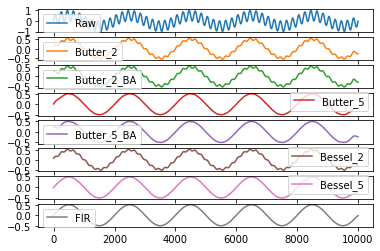

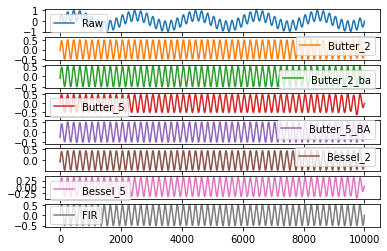

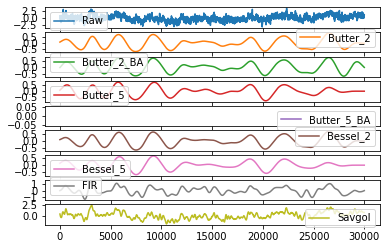

In [ ]:
signal_filter(waves_peak, sampling_rate=SAMPLING_RATE,
    lowcut=10,
    highcut=10,
    method="butterworth",
    order=2,
    window_size="default",
    powerline=50)

Yes, filtering improve the result somewhat!

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#

References:
https://www.geeksforgeeks.org/scipy-display-electrocardiogram/
https://neurokit2.readthedocs.io/en/latest/
https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset

Collabration:
Worked along with Anudeep Veerala.
